In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
pair_df = [data[["Year", "Present_Price", "Kms_Driven", "Owner"]], 
           pd.get_dummies(data[["Fuel_Type", "Seller_Type", "Transmission"]], 
                          drop_first=True), data[["Selling_Price"]]]
X = pd.concat(pair_df, axis=1)
y = data[["Selling_Price"]]

# Independent Variable
X.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Selling_Price
0,2014,5.59,27000,0,0,1,0,1,3.35
1,2013,9.54,43000,0,1,0,0,1,4.75
2,2017,9.85,6900,0,0,1,0,1,7.25
3,2011,4.15,5200,0,0,1,0,1,2.85
4,2014,6.87,42450,0,1,0,0,1,4.60


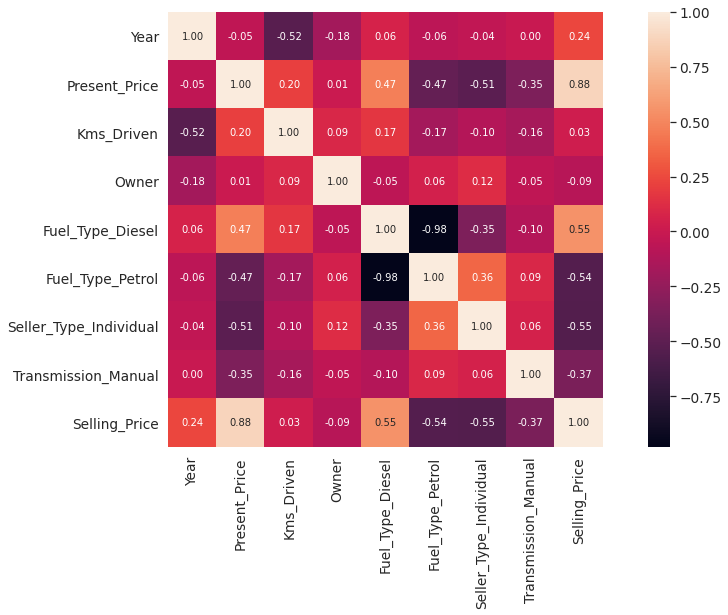

In [4]:
plt.figure(figsize=(16,8))
corrmat = X.corr()
cols = corrmat.index
cm = np.corrcoef(X[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [5]:
# Let's delete the Selling_Price from X
X.drop(labels=["Selling_Price"], axis=1, inplace=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [6]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# Calculating Loss
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# MAE on training data 
print("MSE: ", mean_absolute_error(y_true=y_train, y_pred=linreg.predict(X_train)))

# MSE on training data
print("MAE: ", mean_squared_error(y_true=y_train, y_pred=linreg.predict(X_train)))

MSE:  1.146980681037981
MAE:  2.876321078059306


In [8]:
np.round(linreg.coef_.ravel(), 3)

array([ 0.356,  0.417, -0.   , -1.03 ,  2.712,  0.717, -1.152, -1.438])

In [9]:
X.head(1)

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,0,1,0,1


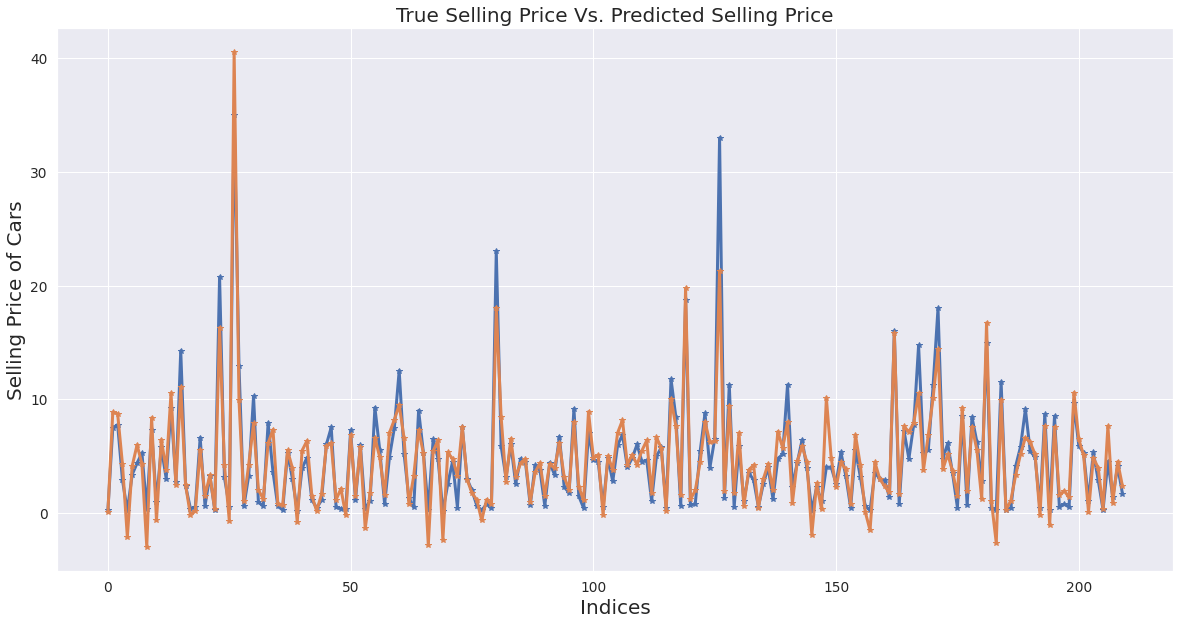

In [10]:
# For training data
plt.figure(figsize=(20, 10))
plt.plot(range(0, len(y_train)), y_train, label="TrueValues", marker="*", linewidth=3)
plt.plot(range(0, len(y_train)), linreg.predict(X_train), label="PredictedValues", marker="*", linewidth=3)
plt.xlabel("Indices",fontsize=20)
plt.ylabel("Selling Price of Cars",fontsize=20)
plt.title("True Selling Price Vs. Predicted Selling Price",fontsize=20)
plt.show()

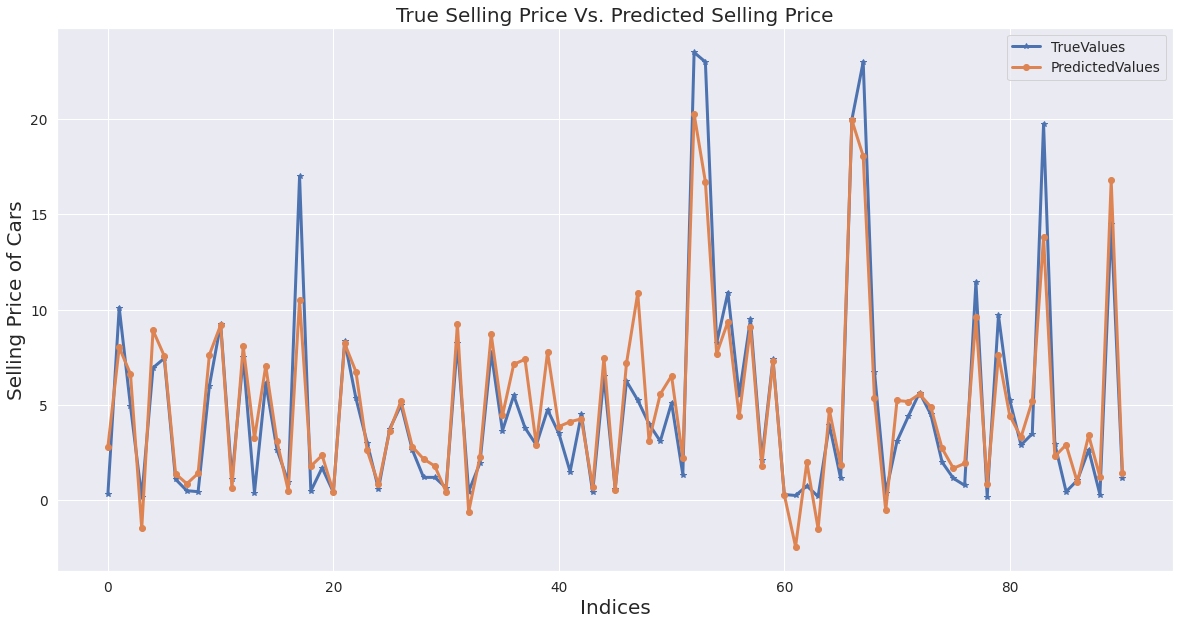

In [11]:
# For Test data
plt.figure(figsize=(20, 10))
plt.plot(range(0, len(y_test)), y_test, label="TrueValues", marker="*", linewidth=3)
plt.plot(range(0, len(y_test)), linreg.predict(X_test), label="PredictedValues", marker="o", linewidth=3)
plt.xlabel("Indices",fontsize=20)
plt.ylabel("Selling Price of Cars",fontsize=20)
plt.title("True Selling Price Vs. Predicted Selling Price",fontsize=20)
plt.legend()
plt.show()